In [1]:
import os
import pickle
import sys
sys.path.append("../")

import contextily as cx
from dotenv import load_dotenv
load_dotenv()
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

from obt import data_utils

In [2]:
-122.5545108, 47.3278938°


In [25]:
response["Contents"][999]

{'Key': 'AK_BrooksCamp_2012/ept-data/7-100-18-62.laz',
 'LastModified': datetime.datetime(2018, 12, 25, 23, 57, 39, tzinfo=tzutc()),
 'ETag': '"e2635f11e6ad9430bf310553f01ecdc6"',
 'Size': 411393,
 'StorageClass': 'STANDARD'}

In [99]:
data_kcm = pd.read_pickle("../data/kcm_realtime/2023_10_17.pkl")
geo = [Point(data_kcm['lon'][i], data_kcm['lat'][i]) for i in range(len(data_kcm))]
gdata_kcm = gpd.GeoDataFrame(data_kcm, geometry=geo).set_crs(epsg=4326)
gdata_kcm = gdata_kcm.to_crs(epsg="32148")

In [105]:
data_atb = pd.read_pickle("../data/atb_realtime/2023_10_17.pkl")
geo = [Point(data_atb['lon'][i], data_atb['lat'][i]) for i in range(len(data_atb))]
# gdata_atb = gpd.GeoDataFrame(data_atb, geometry=geo).set_crs(epsg=4326)
# gdata_atb = gdata_atb.to_crs(epsg="32626")

KeyError: 0

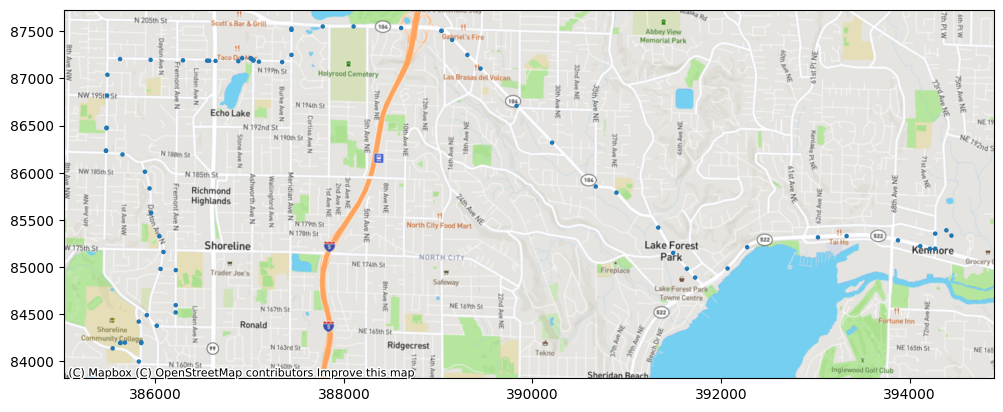

In [96]:
sampled_tripids = gdata.sample(1)['trip_id']
ax = gdata[gdata['trip_id'].isin(sampled_tripids)].plot(markersize=5, column="trip_id", figsize=(12,12))
cx.add_basemap(ax, crs=gdata.crs.to_string(), source=cx.providers.MapBox(accessToken=os.getenv(key="MAPBOX_TOKEN")))

In [63]:
gdata

,trip_id,vehicle_id,lat,lon,orientation,scheduleDeviation,nextStop,locationtime,geometry
0,347461005,7413,47.61543273925781,-122.19438934326172,179.19021958368302,0,67655,1697459727,POINT (397685.499 69329.815)
1,347461005,7413,47.61543273925781,-122.19438934326172,179.19021958368302,6,67612,1697459947,POINT (397685.499 69329.815)
2,347461005,7413,47.61543273925781,-122.19442749023438,179.19021958368302,19,67612,1697459960,POINT (397682.632 69329.866)
3,347461005,7413,47.61543655395508,-122.19493865966797,180.0,36,67612,1697459999,POINT (397644.217 69330.970)
4,347461005,7413,47.61543655395508,-122.19508361816406,180.0,75,67612,1697460019,POINT (397633.321 69331.163)
...,...,...,...,...,...,...,...,...,...
832872,644531095,7220,47.78483581542969,-122.31341552734375,180.0,1485,85254,1697512753,POINT (389101.231 88325.908)
832873,644531095,7220,47.78483581542969,-122.31341552734375,179.34264973059598,1525,85254,1697512774,POINT (389101.231 88325.908)
832874,644531095,7220,47.78483963012695,-122.31400299072266,180.0,1538,85254,1697512814,POINT (389057.227 88327.179)
832875,644531095,7220,47.78483963012695,-122.3146743774414,180.0,1550,85254,1697512834,POINT (389006.928 88328.147)
